### Abstract

* 기존의 기계 번역에서 인코더는 입력 문장을 고정된 길이의 문맥 벡터로 변환하고, 디코더는 문맥 벡터를 바탕으로 번역 문장을 출력
   * bottleneck 문제 발생 - 긴 문장 전체의 정보를 짧은 길이의 고정 벡터로 표현해야 하는 문제
   
   
* 본 연구에서는 모델이 예측하고자 하는 타깃 단어와 관련성이 높은 입력 문장의 일부분을 순차적으로 탐색하게 하여 성능을 높인다
   * Attention의 아이디어 활용

### Introduction

* 기존에 제안된 기계 번역은 인코더-디코더 구조에 의존
   * 인코더 - 입력 문장의 언어 / 디코더 - 출력 문장의 언어 => 인코더, 디코더는 번역 성능을 향상시킬 수 있도록 jointly하게 학습됨
   * 입력 문장의 중요한 정보를 고정된 길이의 벡터에 압축해야 한다는 문제점 발생

* 본 연구는 위와 같은 문제를 해결하고자 제안됨
   * 디코더에서 하나의 결과를 생성(번역)할때 마다, 입력 문장을 순차적으로 탐색하고, 현재 예측하고자 하는 타깃 단어(토큰)와 가장 관련이 있는 영역들을 적용시킴
   * 인코더에서 생성한 문맥 벡터에서 관련성이 크다고 판단되는 토큰들과, 디코더에서 이미 생성한 hidden state 벡터를 기반으로 다음 단어를 생성
   * 디코더에서 연산을 진행하며 인코더에서 생성한 문맥 벡터를 계속해서 참조 => 문장의 길이에 유연한 대처 가능
   
   
   
* 대응 관계를 학습과 번역을 jointly learn하는 본 연구의 알고리즘이 기존의 인코더-디코더 구조보다 높은 성능을 보이는 것을 확인

### Background : NMT

* 기존의 통계 기반 기법들은 조건부 확률 분포를 최대화 하는 방식으로 학습됨
   * arg max p(y|x) / x : 주어진 입력 문장 , y  : 출력 문장(번역본)
   
   
* RNN, LSTM등을 활용하는 인코더-디코더 구조의 NN을 활용하여 이러한 조건부 확률을 직접 학습하는 방법들도 제시되었음 

#### RNN Enocder-Decoder

* 인코더는 다수의 단어(토큰)들로 구성된 시퀀스를 입력으로 받음
  * 특정 시점의 토큰 x를 입력으로 받아 문맥 벡터(hidden state 벡터) c로 mapping

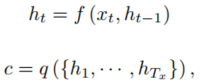

* 디코더는 인코더가 생성한 문맥 벡터 C와 이전 시점까지 예측한 모든 단어들을 바탕으로 예측을 수행
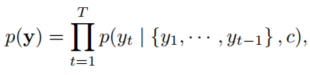
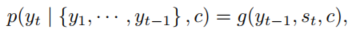

### Learning to Align and Translate

* 인코더는 양방향 RNN을 사용하고, 디코더는 번역을 수행하는 과정동안 인코더에 입력으로 주어진 문장에 대한 탐색 수행
    * 양방향 RNN : 입력 문장에 대해 이전에 나타나는 내용과 이후에 나타나는 내용 모두를 알아야 높은 성능의 번역이 가능
    
    
    
* Attention 기법 사용
  * **모델이 필요에 따라 입력 문장의 관련 부분에 집중할 수 있도록 함**  \
  * **해당 시점에서 예측해야 하는 결과와 연관이 있는 부분을 판단하여 좀 더 집중(Attention)**

#### Decoder

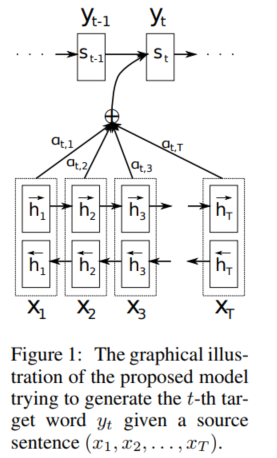


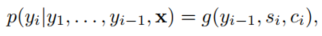

* s_i : i 시점에서의 hidden state
* 기존의 방식과 다르게 예측하고자 하는 타깃 단어 y_i에 문맥 벡터 c_i가 조건으로 주어짐
   * 특정한 i 시점에서의 문맥 벡터 c_i는 distinct, 인코더의 hidden state(annotation)에 의존함 
   * annotation h_i는 i번째 단어 주변 부분들에 더 많은 영향을 받는 정보를 담고 있음 (인코더의 hidden state 출력)

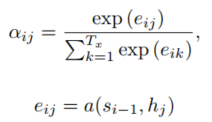
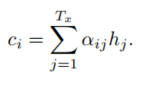

* e : i 시점의 디코더에 입력으로 들어오는 i-1시점의 hidden state와 인코더의 j번째 hidden state(annotation, 문맥 벡터를 구성하는 토큰) 출력간의 **연관성**을 계산


* Attention Score a 
   * softmax 함수가 적용된 가중치, **i시점의 단어를 예측하는데 있어 인코더의 j번째 hidden state 출력에 얼마나 집중을 해야 하는지(attention) 표현**
   * 중요도
   * 입력 문장의 정보가 시퀀스의 개별 시점마다 hidden state 벡터로 저장되어 있고, 디코더는 인코더의 hidden state 벡터들을 순차적으로 검색하며 어떤 부분들이 중요한지 매 시점마다 판단


* 특정 i 시점의 문맥 벡터는 인코더의 모든 hidden state 벡터를 고려함, 단 예측하고자 하는 단어와 관련성이 높은 부분에 **집중**해서


* 디코더에서 학습되는 대응 관계(alignment)는 역전파 알고리즘을 통해 학습됨 (잠재 변수 X)

### Encoder

* 양방향 RNN 사용
  * Forward hidden state
     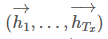 
     
  * Backward hidden state
      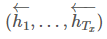
      
      
* 2개를 concatenate하여 최종 hidden vector생성
   * 인접한 state의 정보를 더 많이 가지고 있는 RNN 특성상 h_j는 단어 x_j의 가까운 위치에 있는 단어들의 정보를 더 많이 보유하고 있음
   
   
* Related Work의 handwriting synthesis로부터 제안된 aliging의 경우 가중치가 한 방향으로만 움직임
   * 문법적으로 옳은 문장을 번역하기 위해서는 long distance reordering이 필요하기 때문에 기계 번역에 있어 큰 제한점

### Quanlitative Analysis

#### Alignment

* 어텐션 스코어 a를 통해 입력 문장과 출력 문장 간의 대응 관계를 확인할 수 있음 (soft-alignment)


* hard alignment의 경우 한 단어가 무조건 다른 한 단어와 1:1로 매핑되어야 하지만, 이는 실제 번역에 부합하지 않음
   * soft alignment의 경우 단어간의 일대다 관계를 표현할 수 있어 번역에 있어 보다 좋은 성능을 나타냄

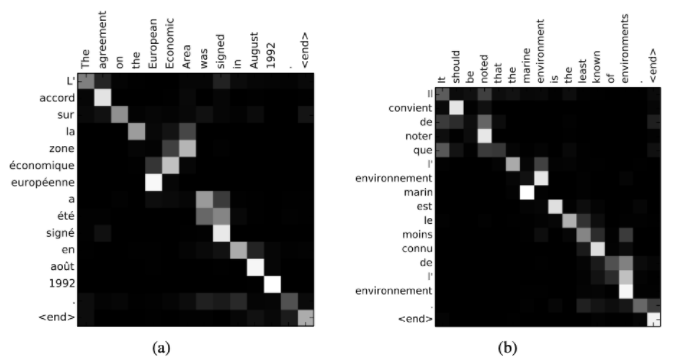